1. Загрузить файл auto.csv
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis
5. Визуализировать несколько взаимосвязей между переменными
6. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
7. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте.

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

 1 Загрузить файл auto.csv

In [3]:
df = pd.read_csv('auto.csv')

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


2 Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [15]:
#среднее
df.mean()

symboling                0.834146
normalized-losses      126.365854
wheel-base              98.756585
length                 174.049268
width                   65.907805
height                  53.724878
curb-weight           2555.565854
engine-size            126.907317
bore                     3.324878
stroke                   3.253366
compression-ratio       10.142537
horsepower             106.048780
peak-rpm              5131.463415
city-mpg                25.219512
highway-mpg             30.751220
price                13312.712195
dtype: float64

In [16]:
#медиана
df.median()

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [17]:
#мода
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# минимум
df.min()

symboling                     -2
normalized-losses             65
make                 alfa-romero
fuel-type                 diesel
aspiration                   std
num-of-doors                four
body-style           convertible
drive-wheels                 4wd
engine-location            front
wheel-base                  86.6
length                     141.1
width                       60.3
height                      47.8
curb-weight                 1488
engine-type                 dohc
num-of-cylinders           eight
engine-size                   61
fuel-system                 1bbl
bore                        2.54
stroke                      2.07
compression-ratio              7
horsepower                    48
peak-rpm                    4150
city-mpg                      13
highway-mpg                   16
price                       5118
dtype: object

In [19]:
#максимум
df.max()

symboling                3
normalized-losses      256
make                 volvo
fuel-type              gas
aspiration           turbo
num-of-doors           two
body-style           wagon
drive-wheels           rwd
engine-location       rear
wheel-base           120.9
length               208.1
width                 72.3
height                59.8
curb-weight           4066
engine-type          rotor
num-of-cylinders       two
engine-size            326
fuel-system           spfi
bore                  3.94
stroke                4.17
compression-ratio       23
horsepower             288
peak-rpm              6600
city-mpg                49
highway-mpg             54
price                45400
dtype: object

In [20]:
# среднее отклонение
df.std()

symboling               1.245307
normalized-losses      35.438400
wheel-base              6.021776
length                 12.337289
width                   2.145204
height                  2.443522
curb-weight           520.680204
engine-size            41.642693
bore                    0.273049
stroke                  0.313937
compression-ratio       3.972040
horsepower             43.468803
peak-rpm              480.933330
city-mpg                6.542142
highway-mpg             6.886443
price                8102.472461
dtype: float64

3 Рассчитать и визуализировать корреляционную матрицу для переменных

In [27]:
corr = df.corr()

corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


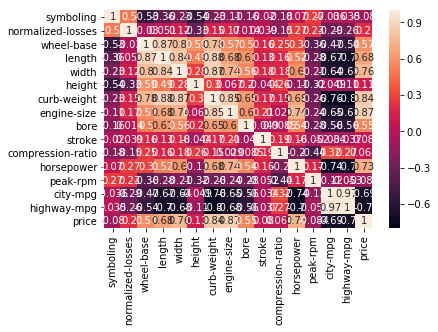

In [28]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

4 Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

In [29]:
price = df['price']

(array([1.00510910e-04, 5.44938670e-05, 4.23841188e-05, 2.05865720e-05,
        8.47682376e-06, 3.63292447e-06, 4.84389929e-06, 9.68779858e-06,
        2.42194965e-06, 1.21097482e-06]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

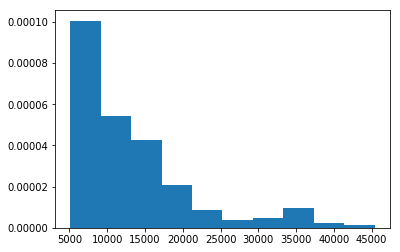

In [30]:
plt.hist(price, density=True)

In [36]:
skewness = stats.skew(price)
kurtosis = stats.kurtosis(price)

print(f'skewness: {skewness:.3}, kurtosis: {kurtosis:.3}')

skewness: 1.75, kurtosis: 2.85


5 Визуализировать несколько взаимосвязей между переменными

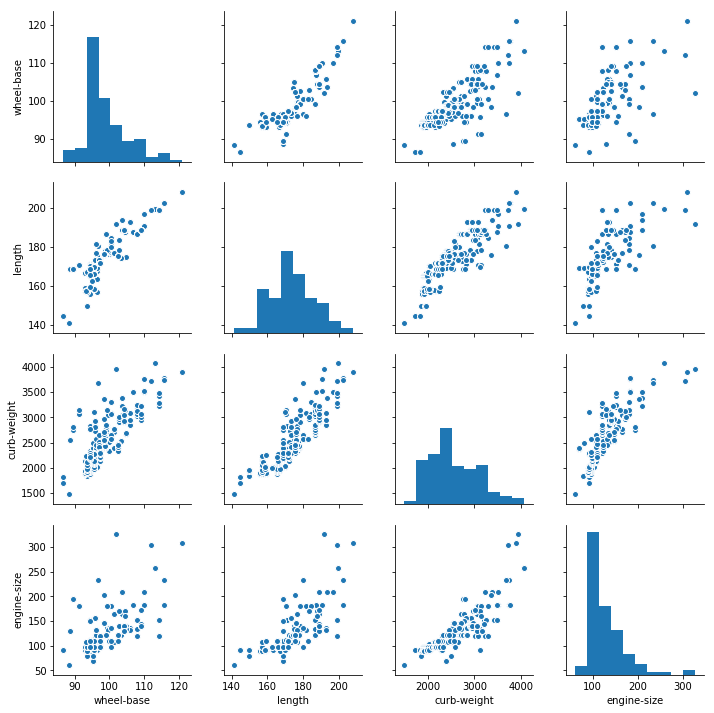

In [40]:
# выбраны 4 параметры с наибольшей корреляцией

sns.pairplot(df, vars=['wheel-base', 'length', 'curb-weight', 'engine-size'])

6 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

Ответ: t-test не подходит для проверки взаимосвязии между переменными, подходит для сравнения среднего по одному показателю для разных групп, например, средний доход для мужчин или женщин, совпадает ли среднее или пол влияет на средний доход.

In [41]:
stats.ttest_ind(df['wheel-base'], df['length'])

Ttest_indResult(statistic=-78.52501821672536, pvalue=2.214091958718416e-248)

In [42]:
stats.ttest_ind(df['wheel-base'], df['normalized-losses'])

Ttest_indResult(statistic=-10.997062892722814, pvalue=8.199783918680662e-25)

In [54]:
# вне лабы, себе на память
gas = df[df['fuel-type']=='gas']['price']
diesel = df[df['fuel-type']=='diesel']['price']
stats.ttest_ind(gas,diesel)

#не можем отвергнуть гипотезу, что вид топлива не влияет на цену.

Ttest_indResult(statistic=-1.4715061487687495, pvalue=0.1427027883743746)

In [55]:
stats.ttest_ind(df['city-mpg'], df['highway-mpg'])

Ttest_indResult(statistic=-8.338312640543368, pvalue=1.1688699865371373e-15)